In [1]:
import torch
import torchvision
import torchvision.utils as vutils
import numpy as np
from torch.autograd import Variable
from torchvision import transforms

In [4]:
np.set_printoptions(precision=4) # preserve 4-bit decimal

In [5]:
gDevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gDevice
torch.tensor([1,1]).to(gDevice)

tensor([1, 1], device='cuda:0')

-----------

In [58]:
a = np.array([[1,2,3], [4,5,6]], dtype=float).reshape(-1, 3)
b = np.array([2,2]).reshape(-1, 2)
c = np.sum(a, 1)
for i in range(a.shape[0]):
    factor = np.sum(a[i,:])
    print(factor, a[i,:])
    for j in range(a.shape[1]):
        a[i][j] /= factor
a
np.sum(a, 1)

6.0 [1. 2. 3.]
15.0 [4. 5. 6.]


array([1., 1.])

In [52]:
from trainer import BlahutArimoto
r = np.random.rand(1, 5)
r = r / np.sum(r)
pxc = np.array([i+1 for i in range(35)]).reshape(5, -1)
pxc = pxc / np.sum(pxc, 0)
ba = BlahutArimoto(r, pxc)
np.matmul(ba.input_dist, ba.transition)
ba.Update(1e-3)

array([[0.17948893, 0.18867286, 0.19916946, 0.21038595, 0.2222828 ]])

In [53]:
a = np.array([1,2,3]).reshape(-1, 3)
b = np.array(np.arange(12)).reshape(3, 4)
c = np.asarray([a*b[:, i] for i in range(b.shape[1])])
c.squeeze()

array([[ 0,  8, 24],
       [ 1, 10, 27],
       [ 2, 12, 30],
       [ 3, 14, 33]])

In [13]:
m = torch.nn.Softmax(dim=0)
input = torch.randn(2, 3)
output = m(input)
print(torch.sum(output, dim=0))
output

tensor([1.0000, 1.0000, 1.0000])


tensor([[0.0436, 0.5056, 0.9316],
        [0.9564, 0.4944, 0.0684]])

In [15]:
t = torch.FloatTensor([[1,2], [3, 4]])
v = Variable(t)
print(t)
print(v)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])


In [16]:
torch.__version__

'1.2.0'

--------------------

In [21]:
x = torch.tensor(3.0)
y = torch.tensor(9.0, requires_grad=True)
z = x * y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False True True


In [22]:
z.backward()

In [25]:
print(x.grad, y.grad)

None tensor(3.)


In [26]:
x = torch.tensor(3.0)
y = torch.tensor(9.0)
z = x * y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [27]:
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

----------------

In [35]:
x = torch.FloatTensor(2, 3)
y = torch.FloatTensor(2, 3)
z = x + y
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [36]:
z.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [47]:
x = torch.FloatTensor(1, 3)
y = torch.FloatTensor(3, 1)
x.copy_(torch.Tensor([1,2,3]).reshape(1, 3))
y.copy_(torch.Tensor([3,2,1]).reshape(3, 1))
x = x.cuda()
y = y.cuda()

#for i in [x, y]:
#    i.requires_grad = True
#    i = i.cuda()
    
z = torch.matmul(x, y)
print(x.requires_grad, y.requires_grad, z.requires_grad)

False False False


In [48]:
x.device

device(type='cuda', index=0)

In [87]:
z.backward()

In [88]:
print(x)

tensor([[0., 0., 0.]], device='cuda:0', requires_grad=True)


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [43]:
a = torch.Tensor([[1,2], [3,4]]).to(device)
a

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

--------------------

In [46]:
prob = np.array([1]).repeat(10)
prob = prob / np.sum(prob)
prob

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [49]:
fix_noise = torch.Tensor(4, 9).uniform_(-1, 1)
torch.sum(fix_noise, 0)

tensor([ 0.7561, -0.6353, -0.9810,  0.6177, -0.4096,  0.6287, -0.9262, -1.5623,
         0.4151])

In [3]:
for i in range(3):
    scopedvar = 4
print(scopedvar * 5)

20


In [20]:
cat_prob = np.random.rand(10)
cat_prob = cat_prob / np.sum(cat_prob)
cat_prob

array([0.17232439, 0.16382443, 0.11523406, 0.11970304, 0.00879328,
       0.11488785, 0.00523764, 0.10539708, 0.01461249, 0.17998574])

-------------

In [38]:
a = torch.randn(1,2,3,4)
a.size()

torch.Size([1, 2, 3, 4])

In [39]:
b = a.transpose(1, 2)
b.size()

torch.Size([1, 3, 2, 4])

In [40]:
c = a.view(1,3,2,4)
c.size()

torch.Size([1, 3, 2, 4])

In [41]:
print(a, b, c)

tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-0.3872, -0.7257, -0.8900, -0.8064],
          [ 1.1872, -0.6507, -0.8089, -0.3178]],

         [[-1.4208, -2.0442,  0.5316,  0.3203],
          [ 1.6414, -0.2458,  0.3597,  1.8031],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]]) tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-1.4208, -2.0442,  0.5316,  0.3203]],

         [[-0.3872, -0.7257, -0.8900, -0.8064],
          [ 1.6414, -0.2458,  0.3597,  1.8031]],

         [[ 1.1872, -0.6507, -0.8089, -0.3178],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]]) tensor([[[[ 0.3998, -2.2906,  0.4069,  0.6118],
          [-0.3872, -0.7257, -0.8900, -0.8064]],

         [[ 1.1872, -0.6507, -0.8089, -0.3178],
          [-1.4208, -2.0442,  0.5316,  0.3203]],

         [[ 1.6414, -0.2458,  0.3597,  1.8031],
          [ 0.2636, -2.5598, -0.6178, -0.0852]]]])


In [42]:
print(id(a), id(b), id(c))

139868516397776 139865104858496 139864942436424


In [60]:
p = np.array([[1.,2], [3, 4]])
p /= np.sum(p, 1).reshape(2,1)

array([[0.33333333, 0.66666667],
       [0.42857143, 0.57142857]])

----------

In [86]:
t = torch.FloatTensor(100, 5)
t.normal_()
torch.mean(t, 0)

tensor([-0.0777,  0.0300, -0.0766, -0.0813,  0.1303])

In [90]:
c = torch.FloatTensor(2, 3).to(gDevice)
c.uniform_()
c.requires_grad

False

---------

In [168]:
import matplotlib.pyplot as plt
dataset = torchvision.datasets.STL10('../datasets', transform=torchvision.transforms.ToTensor(), download=True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)

Files already downloaded and verified


torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])
(96, 96, 3)
torch.Size([100, 3, 96, 96])


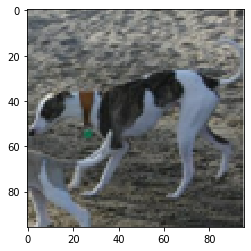

In [169]:
for num_iter, (images, _) in enumerate(dataloader):
    print(images.size())
    if num_iter > 5:
        break
    img = images[0].numpy()
    img = img.transpose(1, 2, 0)
    print(img.shape)
    plt.imshow(img)

------------

In [145]:
from torch.utils.data import WeightedRandomSampler

In [150]:
prob = [1, 1, 1, 9]
data = WeightedRandomSampler(prob, 100, replacement=True)
list(data)

[3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0]

------------------

Bring Imbalance to MNIST
=====================

In [11]:
import matplotlib.pyplot as plt
import random
import copy

torch.manual_seed(2333)
np.random.seed(2333)

def ShowMnist(arr, nrow=5, ncol=10, figsize=None):
    if figsize is None:
        figsize = (ncol, nrow)
    
    f, a = plt.subplots(nrow, ncol, figsize=figsize)
    
    def _do_show(the_fig, the_arr):
        the_fig.imshow(the_arr)
        the_fig.axis('off')
    
    for i in range(nrow):
        for j in range(ncol):
            _do_show(a[i][j], np.reshape(arr[i*ncol + j], (28, 28)))
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.draw()

def DrawDistribution(dataset, title):
    # labels = np.array([])
    # for _, l in dataloader:
    #     labels = np.hstack([labels, l.numpy()])
        
    # print(labels.size)
        
    label, counts = np.unique(dataset.targets, return_counts=True)
    fig, ax = plt.subplots()
    ax.bar(label, counts)
    ax.set_xticks(label)
    ax.set_title(title)
    fig.show()

sample probs: [0.6        0.8944875  0.6        0.92696067 0.6        0.6
 0.6        0.72967625 0.6        0.6       ]
ib ratio: [0.08738293 0.14796744 0.08824106 0.13938606 0.08451429 0.07985583
 0.0864022  0.11408326 0.08600991 0.08615701]
original dataset size: 60000
imbalanced dataset size: 40786


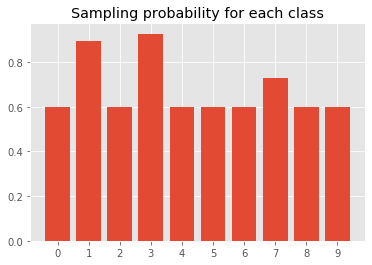

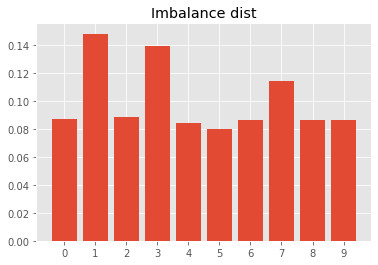

In [124]:
from utils import ImbalanceSampler
dataset = torchvision.datasets.MNIST('../datasets', transform=transforms.ToTensor())
sample_probs = np.random.rand(10)
idx = [i for i in range(10) if sample_probs[i] < 0.6]
sample_probs[idx] = 0.6
ib = ImbalanceSampler(dataset, sample_probs)
ib_dataset, ib_ratio = ib.ImbalancedDataset()

print('sample probs:', sample_probs)
print('ib ratio:', ib_ratio)
print('original dataset size:', len(dataset))
print('imbalanced dataset size:', len(ib_dataset))


labels = np.arange(10)

fig, ax = plt.subplots()
ax.bar(labels, sample_probs)
ax.set_xticks(labels)
plt.title("Sampling probability for each class")
plt.show()

fig, ax = plt.subplots()
ax.bar(labels, ib_ratio)
ax.set_xticks(labels)
plt.title("Imbalance dist")
plt.show()

In [126]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
np.sum(sample_probs)

1.0

In [121]:
sample_probs = np.random.rand(10)
labels = np.arange(10)
dataset = torchvision.datasets.MNIST('../datasets', transform=torchvision.transforms.ToTensor(), download=True)
idx_to_del = [i for i, label in enumerate(dataset.targets)
             if np.random.rand() > sample_probs[label]]
imbalanced_dataset = copy.deepcopy(dataset)
imbalanced_dataset.targets = np.delete(dataset.targets, idx_to_del, axis=0)
imbalanced_dataset.data = np.delete(dataset.data, idx_to_del, axis=0)

NameError: name 'copy' is not defined

In [352]:
loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)

imbalanced_loader = torch.utils.data.DataLoader(
dataset, batch_size=100, sampler=WeightedRandomSampler(sample_probs, 20000), num_workers=1)

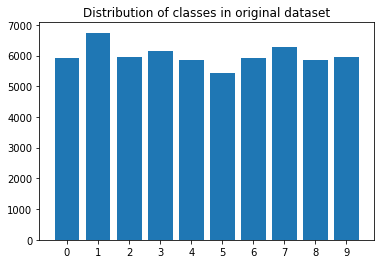

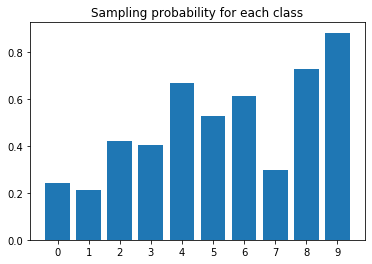

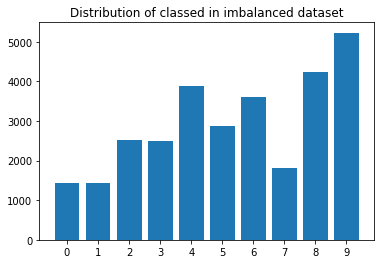

In [135]:
DrawDistribution(dataset, "Distribution of classes in original dataset")
fig, ax = plt.subplots()
ax.bar(labels, sample_probs)
ax.set_xticks(labels)
plt.title("Sampling probability for each class")
plt.show()
DrawDistribution(imbalanced_dataset, "Distribution of classed in imbalanced dataset")

In [373]:
type(imbalanced_dataset)

torchvision.datasets.mnist.MNIST

(array([22., 23., 21., 17., 24., 24., 19., 18., 13., 19.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

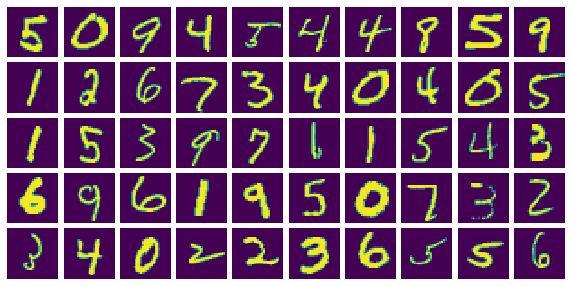

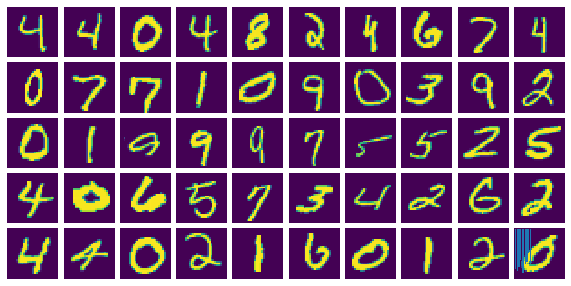

In [294]:
x = np.array([])
for num_iter, (images, _) in enumerate(dataloader):
    if num_iter > 1:
        break
    x = np.hstack([x, _.numpy()])
    ShowMnist(images)
plt.hist(x, bins=10, align='mid', rwidth=0.8)

In [269]:
len(dataloader)

600

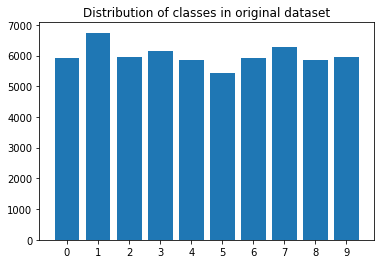

In [295]:
label, counts = np.unique(dataloader.dataset.targets, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label, counts)
ax.set_xticks(label)
plt.title(r"Distribution of classes in original dataset")
plt.show()

In [8]:
a = np.array([1,2,3])
b = np.array([1,-2,0])
np.linalg.norm(a-b)b

5.0

--------------

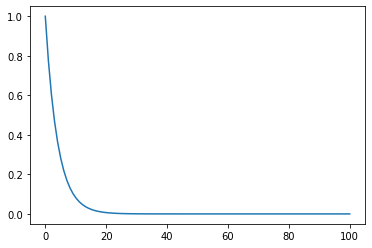

In [114]:
x = np.linspace(0, 100, num=100)
plt.plot(x, np.exp(-x/4))

In [46]:
max(np.exp(-10/4), 1e-8)

0.0820849986238988

File I/O Demo
=============

In [51]:
a = np.array([1,2,3,4,5])
b = np.array([range(12)]).reshape(3, 4)
np.savez('toydata.npz', kwa=a, kwb=b)

In [60]:
c = np.load('toydata.npz')
print(type(c['kwa']), c['kwb'])
c["kwc"]

<class 'numpy.ndarray'> [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


KeyError: 'kwc is not a file in the archive'

----------------

In [69]:
a = torch.rand(10)
torch.sum(a)

tensor(4.7118)

New BA Checker
===============

In [110]:
r = np.array([0.9, 0.1])
pxc = np.array([[0.6,0.4], [0.1,0.9]])
print(pxc.shape)
post = np.asarray([r * pxc[:, i] for i in range(pxc.shape[1])])
print(post)
factor = np.sum(post, axis=1).reshape(-1, 1)
print(factor)
post /= factor
print(post)
r = r.reshape(1, -1)

(2, 2)
[[0.54 0.01]
 [0.36 0.09]]
[[0.55]
 [0.45]]
[[0.9818 0.0182]
 [0.8    0.2   ]]


array([[0.8836, 0.0018],
       [0.72  , 0.02  ]])

In [113]:
np.linspace(0, 1, 100)

array([0.    , 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707,
       0.0808, 0.0909, 0.101 , 0.1111, 0.1212, 0.1313, 0.1414, 0.1515,
       0.1616, 0.1717, 0.1818, 0.1919, 0.202 , 0.2121, 0.2222, 0.2323,
       0.2424, 0.2525, 0.2626, 0.2727, 0.2828, 0.2929, 0.303 , 0.3131,
       0.3232, 0.3333, 0.3434, 0.3535, 0.3636, 0.3737, 0.3838, 0.3939,
       0.404 , 0.4141, 0.4242, 0.4343, 0.4444, 0.4545, 0.4646, 0.4747,
       0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354, 0.5455, 0.5556,
       0.5657, 0.5758, 0.5859, 0.596 , 0.6061, 0.6162, 0.6263, 0.6364,
       0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.697 , 0.7071, 0.7172,
       0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.798 ,
       0.8081, 0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788,
       0.8889, 0.899 , 0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596,
       0.9697, 0.9798, 0.9899, 1.    ])

----------------

In [5]:
sample_prob = np.random.rand(10)
idx = [i for i in range(10) if sample_prob[i] < 0.5]
sample_prob[idx] = 0.5
sample_prob /= np.sum(sample_prob)
sample_prob

array([0.0778, 0.0778, 0.1247, 0.1515, 0.0778, 0.0778, 0.1117, 0.0778,
       0.1454, 0.0778])

In [28]:
a = torch.randn(2, 3)
print(a)
torch.sum(a, 1)

tensor([[ 1.3791, -0.3038,  0.4532],
        [ 0.9900, -0.5956,  1.5288]])


tensor([1.5284, 1.9231])

ggplot Demo
===========

In [8]:
import plotnine as P
import pandas as pd

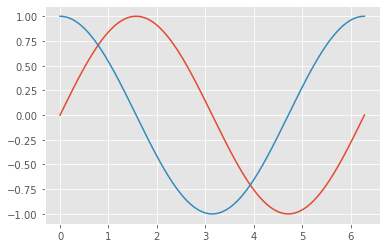

In [35]:
x = np.linspace(0, 2 * np.pi, num=1000)
y1 = np.sin(x)
y2 = np.cos(x)
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    plt.plot(x, y1, x, y2)
plt.show()

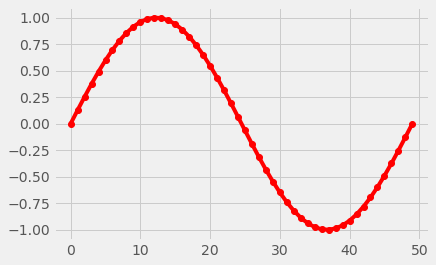

In [46]:
with plt.style.context('fivethirtyeight'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

In [9]:
data = pd.DataFrame(np.vstack([x,y1, y2]).T, columns=['x', 'y1', 'y2'])
data.head()

,x,y1,y2
0,0.000000,0.000000,1.000000
1,0.006289,0.006289,0.999980
2,0.012579,0.012579,0.999921
3,0.018868,0.018867,0.999822
4,0.025158,0.025155,0.999684


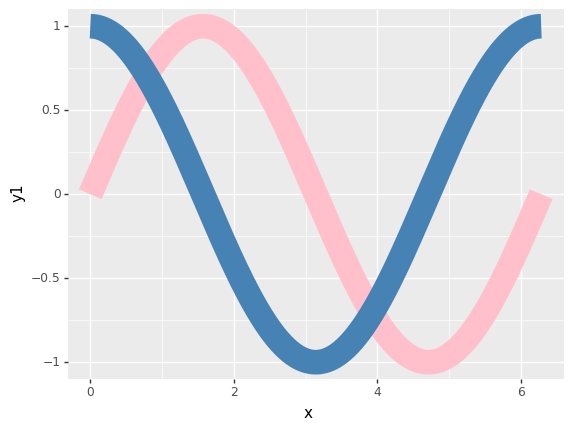

<ggplot: (8733354519528)>

In [29]:
fig = P.ggplot(data, P.aes(x='x', color='y')) +\
P.geom_line(P.aes(y='y1'), color='pink', size=10) +\
P.geom_line(P.aes(y='y2'), color='steelblue', size=10)
fig

In [111]:
data = pd.DataFrame(np.vstack([np.arange(10), sample_prob]).T, columns=['labels', 'probs'])
data.head()
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


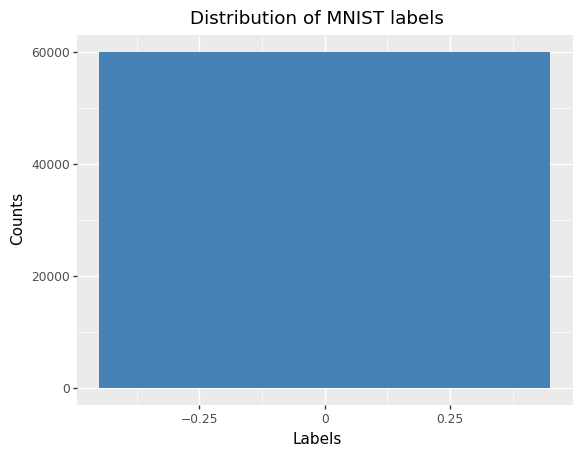

<ggplot: (8733354671010)>

In [27]:
p = P.ggplot(pd.DataFrame(dataset.targets.numpy()), P.aes('0')) +\
P.geom_bar(fill='steelblue') + P.xlab("Labels") + P.ylab('Counts') +\
P.ggtitle("Distribution of MNIST labels")
p

Matplotlib Demo
=============

In [47]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

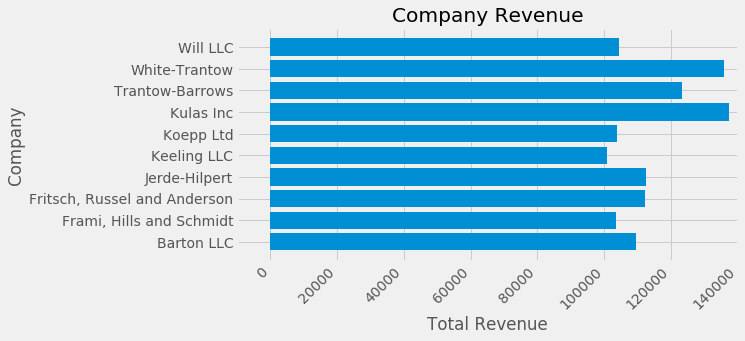

In [59]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

Result Analysis Draft
====================

In [165]:
res = np.load('results.npz')
plt.style.use('ggplot')

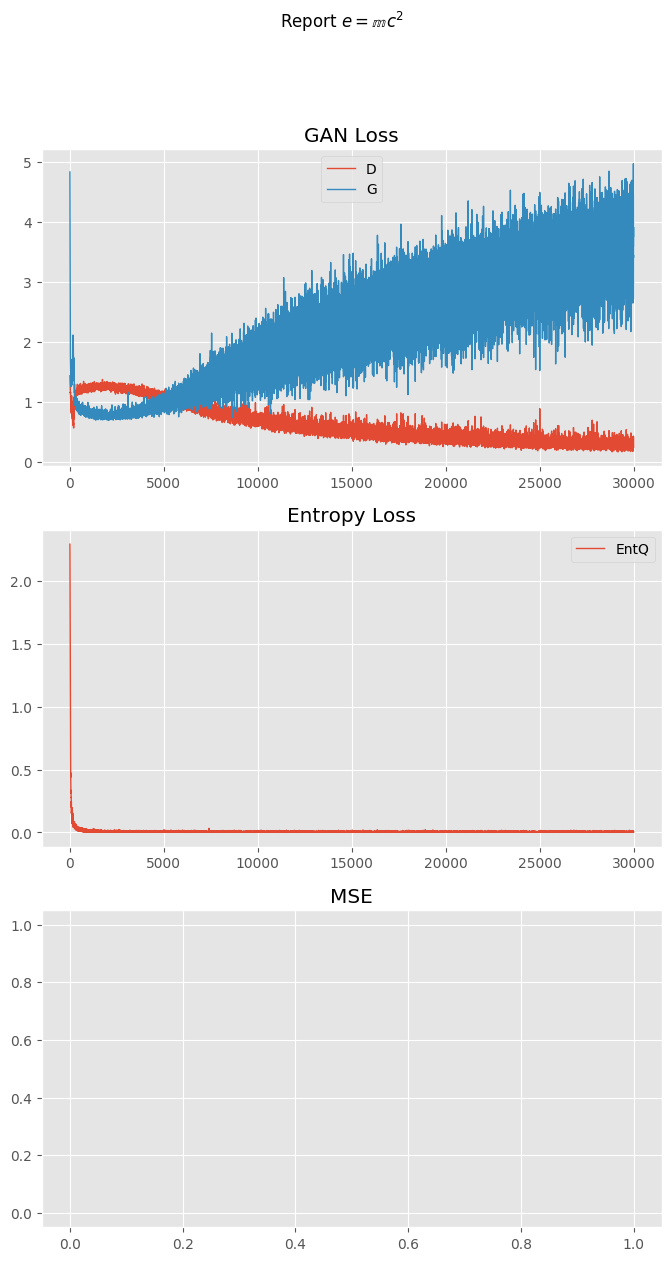

In [187]:
fig, axes = plt.subplots(3, 1, figsize=(8,14))
num_iters = res['Dloss'].size
axes[0].plot(res['Dloss'], label='D', linewidth=1)
axes[0].plot(res['Gloss'], label='G', linewidth=1)
axes[0].legend()
axes[0].set_title('GAN Loss')
# axes[1].plot(range(num_iters), res['EntP'], label='EntP', linewidth=1)
axes[1].plot(res['EntQ'], label='EntQ', linewidth=1)
axes[1].legend()
axes[1].set_title('Entropy Loss')
axes[2].set_title('MSE')
axes[2].plot(res['MSE'])
fig.suptitle('Report $e=\mathbb{m}c^2$')
fig.savefig('haha.png')

In [104]:
c = np.linspace(-1, 1, 20).reshape(1, -1)
c = np.repeat(c, 10, 0).reshape(-1, 1)
idx = np.arange(10).repeat(20)
idx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [111]:
res['EntQ']

array([2.28688526e+00, 2.28069210e+00, 2.26817536e+00, ...,
       3.07751680e-03, 2.13556574e-03, 1.09570008e-03])

----------------------

In [6]:
from utils import get_data
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dataset = get_data('STL10', '../datasets')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)
print(len(dataloader))

Files already downloaded and verified
50


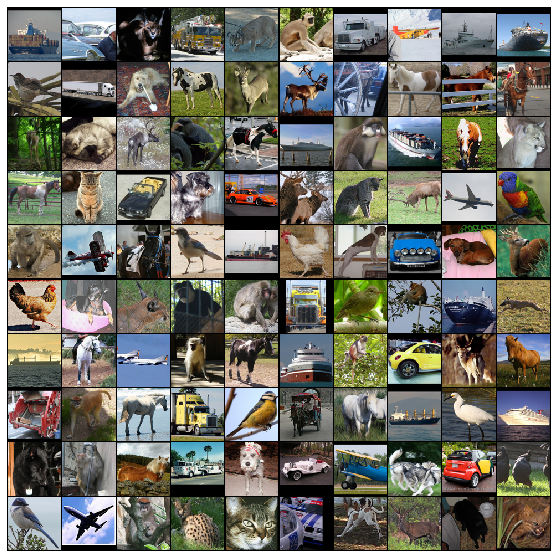

In [7]:
sample_batch = next(iter(dataloader))
plt.figure(figsize=(10, 10))
plt.axis('off')
fig = vutils.make_grid(sample_batch[0][: 100], nrow=10, padding=2, normalize=True)
fig = fig.numpy()
fig = fig.transpose(1, 2, 0)
plt.imshow(fig)

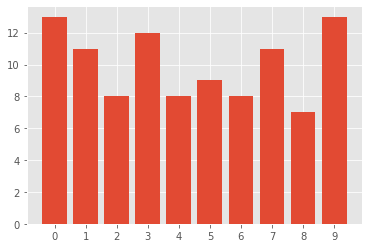

In [5]:
labels, counts = np.unique(sample_batch[1], return_counts=True)
plt.bar(labels, counts)
plt.xticks(labels)
plt.show()

In [118]:
sample_batch[0].size()

torch.Size([100, 1, 28, 28])

In [10]:
import os
pwd = os.getcwd()
path = os.path.join(pwd, 'haha', 'hehe', 'pupu')
path

'/home/yychi/Documents/workspace/now_work/Torch-InfoGAN/haha/hehe/pupu'

In [147]:
c = np.linspace(-1, 1, 10).reshape(1, -1)
c = np.repeat(c, 10, 0).reshape(-1, 1)
idx = np.arange(10).repeat(10)
onehot = np.zeros((100, 10))
onehot[range(100), idx] = 1
onehot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [157]:
torch.as_tensor(onehot, dtype=torch.float32)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],


Dict to Txt Demo
==============

In [194]:
hidic = {
    'a': 12,
    'b': {
        'aa': 11,
        'bb': 22
    },
    'c': 'haha'
}
with open('dic.txt', 'w') as f:
    f.write(str(hidic))

In [199]:
with open('dic.txt', 'r') as f:
    a = f.read()
    print(a)
    recover = eval(a)
recover['d'] = 'new item'

{'a': 12, 'b': {'aa': 11, 'bb': 22}, 'c': 'haha'}


In [200]:
recover

{'a': 12, 'b': {'aa': 11, 'bb': 22}, 'c': 'haha', 'd': 'new item'}

---------------

In [257]:
a = torch.zeros(4, 5).view(4, 5, 1, 1)
a.normal_(0, 0.1)
a = a.view(5, -1)
a.size()
a = np.random.uniform(-1,1, (100, 2))
torch.FloatTensor(a.shape).uniform_(-1, 1)

tensor([0.8354, 0.6731])

Gif Generating Test
=================

In [8]:
import imageio

In [12]:
basepath = os.getcwd()
img_dir = os.path.join(basepath, 'results', 'MNIST', 'vanilla_infogan')
i0 = imageio.imread(img_dir + '/c0-epoch-2.png')

(-0.5, 301.5, 301.5, -0.5)

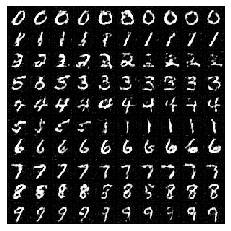

------------------------

In [56]:
trans_prob = torch.tensor([
    [0.1, 0.9],
    [0.5, 0.5],
    [0.9, 0.1]
])
cat_prob = np.array([0.3, 0.4, 0.5])
print(trans_prob, cat_prob)
torch.sum(trans_prob, 1)

tensor([[0.1000, 0.9000],
        [0.5000, 0.5000],
        [0.9000, 0.1000]]) [0.3 0.4 0.5]


tensor([1., 1., 1.])

In [60]:
def ComputePost(cat_prob, trans_prob):
    post_dist = [(cat_prob * trans_prob[:,i])
                 for i in range(trans_prob.size(1))]
    post_dist = torch.cat(post_dist).view_as(trans_prob.transpose(1,0))
    factor = torch.sum(post_dist, dim=1).view(-1, 1)
    post_dist /= factor
    print(post_dist)
    return post_dist

In [61]:
cat_prob = torch.as_tensor(cat_prob, dtype=torch.float32)
post_dist = ComputePost(cat_prob, trans_prob)
torch.sum(post_dist, dim=1)

tensor([[0.0441, 0.2941, 0.6618],
        [0.5192, 0.3846, 0.0962]])


tensor([1.0000, 1.0000])

In [66]:
a = torch.zeros(4, 5)
print(a)
a.narrow(1, 0, 3).normal_(0, 1)
print(a)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 1.5795, -1.8452, -1.2624,  0.0000,  0.0000],
        [-0.8085, -1.0960,  1.9572,  0.0000,  0.0000],
        [ 1.1678, -1.1945, -0.3066,  0.0000,  0.0000],
        [ 1.5003,  0.5498,  0.4277,  0.0000,  0.0000]])


In [90]:
p = torch.tensor(0.95)
print(p)
if torch.bernoulli(p) == 1:
    print('pass')

tensor(0.9500)
pass


In [95]:
torch.randperm(5)

tensor([2, 1, 4, 0, 3])

Python Iterator
================

In [115]:
l1 = [1,2,3,4,5,6]
i1 = l1.__iter__()
i2 = iter(l1)
print(next(i2), next(i2), next(i1), next(i2))

1 2 1 3


In [120]:
for i in range(5):
    print(i)
    i += 1

0
1
2
3
4


In [128]:
floor(5.5)

NameError: name 'floor' is not defined

---------------

In [10]:
from utils import get_data, CustomDataset
from torch.utils.data import DataLoader
dataset = get_data('MNIST', '../datasets')

In [7]:
d = CustomDataset(dataset, 0.01)
labeled_data = d.labeled()
unlabeled = d.unlabeled()

In [11]:
lodaer = DataLoader(labeled_data, batch_size=64, shuffle=True, num_workers=1)

In [23]:
loader = iter(lodaer)
next(loader)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

-------------

In [24]:
md = torch.load('results/MNIST/ss-first-try/checkpoint/model-final.pt')

In [26]:
from models.official_mnist import FrontD, Q

In [30]:
fd = FrontD()
q = Q()
fd.load_state_dict(md['FrontD'])
q.load_state_dict(md['Q'])

<All keys matched successfully>

In [36]:
a = np.random.randn(3, 4)
print(a)
np.argmax(a, 1)

[[-0.87573654  0.25553262  0.09597882 -1.82127398]
 [-0.3096091  -0.57297727 -0.72261138  0.12832182]
 [-1.67275953 -0.24500824 -1.37038694  1.39144953]]


array([1, 3, 3])

-----------------

In [39]:
num_labeled_data = 102
num_data_per_class = 10
targets_to_draw = np.arange(10).repeat(num_data_per_class)
print(targets_to_draw)


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


In [40]:
arr = np.arange(12) + 1
mask = np.ones(len(arr), dtype=bool)
mask[[0,2,4]] = False
print(arr[mask])

[ 2  4  6  7  8  9 10 11 12]


In [3]:
from utils import CustomDataset
dataset = torchvision.datasets.CIFAR10('../datasets', train=False, transform=torchvision.transforms.ToTensor())

-------------------------
Origin dataset has 10000 samples
Now splitted into 211 labeled/ 9789 unlabeled
-------------------------


Dataset CIFAR10
    Number of datapoints: 9789
    Root location: ../datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

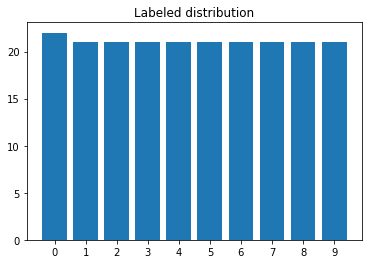

In [12]:
d = CustomDataset(dataset, 0.0211)
d.report()
DrawDistribution(d.labeled, 'Labeled distribution')
d.unlabeled

In [27]:
np.random.randint(10, size=100)

array([6, 6, 6, 8, 6, 6, 8, 7, 1, 0, 0, 9, 2, 2, 8, 2, 5, 0, 8, 8, 3, 7,
       4, 7, 8, 7, 7, 6, 3, 8, 2, 0, 3, 5, 2, 0, 1, 2, 4, 7, 3, 2, 1, 9,
       6, 9, 9, 3, 6, 2, 8, 5, 8, 4, 4, 6, 0, 9, 5, 0, 7, 5, 6, 8, 4, 4,
       8, 3, 7, 7, 5, 3, 7, 6, 4, 1, 7, 9, 9, 8, 1, 2, 6, 1, 2, 4, 4, 2,
       4, 8, 9, 0, 3, 4, 3, 6, 2, 0, 8, 7])

In [10]:
a = np.arange(12).tolist()
mask = np.zeros(len(a), dtype=bool)
mask[[0,2,4]] = True
a.index(mask)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()